# Comparative Graphs   

## Sample 0505-0101

### Relative KO abundance from RPKM

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
import json

In [3]:
def create_dict(filename):
    with open(filename, "r") as file:
        dictionary = json.load(file)
        dictionary2 = dict(sorted(dictionary.items()))
    return dictionary2

In [4]:
def get_sample_dict(dictionary, sample):
    sample_dict = {}
    for ko, dict in dictionary.items():
        sample_dict[ko] = dict[sample]
    return sample_dict

In [5]:
# def merge_dicts(dict1:dict, dict2:dict):
#     merged_dict = {}
#     #count = 0
#     for ko, abun in dict1.items():
#         try:
#             merged_dict[ko] = [abun, dict2[ko]] # hay keys que no estan en el dict de humann, habria que comprobar si tb pasa al contrario
#         except:
#             #count +=1 
#             merged_dict[ko] = [abun, 0]
    
#     for ko, abun in dict2.items():
#         if ko not in merged_dict.keys():
#             merged_dict[ko] = [0, abun]
#     return merged_dict




In [6]:
def merge_dicts(dict1:dict, dict2:dict):
    merged_dict = {}
    #count = 0
    for ko, abun in dict1.items():
        if ko != 'UNMAPPED':
            if abun != 0:
                try:
                    if dict2[ko] != 0:
                        merged_dict[ko] = [abun, dict2[ko]] # hay keys que no estan en el dict de humann, habria que comprobar si tb pasa al contrario
                except:
                    continue
    return merged_dict

In [7]:
def merge_dicts(dict1:dict, dict2:dict):
    merged_dict = {}
    #count = 0
    for ko, abun in dict1.items():
        if abun != 0:
            try:
                if dict2[ko] != 0:
                    merged_dict[ko] = [abun, dict2[ko]] # hay keys que no estan en el dict de humann, habria que comprobar si tb pasa al contrario
            except:
                continue
    return merged_dict

In [8]:
def get_xy(dict):
    xy = list(dict.values()) 
    x_list = []
    y_list = []
    xy_list = []
    for x, y in xy:
        x_list.append(x)
        y_list.append(y)
        if x!=0 and y!=0:
            xy_list.append([x,y])
    xy_list.sort(reverse=True)
    
    return x_list, y_list #, xy_list

In [9]:
ko_eggnog_file = '/Users/lucia/Desktop/TFM/scripts/final/new_tpm_results/ko_abundance.json'
tm_eggnog_file = '/Users/lucia/Desktop/TFM/scripts/final/new_tm_results/ko_abundance.json'
noun_eggnog_file = '/Users/lucia/Desktop/TFM/scripts/final/new_tm_results/ko_abundance.json'


ko_squeeze_file = '/Users/lucia/Desktop/TFM/scripts/final/squeeze_results/ko_abundance.json'

ko_humann_file = '/Users/lucia/Desktop/TFM/scripts/final/humann_results/ko_abundance.json'
my_humann_file = '/Users/lucia/Desktop/TFM/scripts/final/my_humann_results/ko_abundance.json'
noun_humann_file = '/Users/lucia/Desktop/TFM/scripts/final/humann_no_unmapped_results/ko_abundance.json'

tm_narrowest_eggnog_file = '/Users/lucia/Desktop/TFM/scripts/final/narrowest_tm_results/ko_abundance.json'
narrowest_eggnog_file = '/Users/lucia/Desktop/TFM/scripts/final/narrowest_tpm_results/ko_abundance.json'

In [10]:
rpkm_eggnog_dict = create_dict(ko_eggnog_file)
tm_eggnog_dict = create_dict(tm_eggnog_file)
tm_narrowest_eggnog_dict = create_dict(tm_narrowest_eggnog_file)
narrowest_eggnog_dict = create_dict(narrowest_eggnog_file)
noun_eggnog_dict = create_dict(noun_eggnog_file)

ko_squeeze_dict = create_dict(ko_squeeze_file)

ko_humann_dict = create_dict(ko_humann_file)
my_humann_dict = create_dict(my_humann_file)
noun_humann_dict = create_dict(noun_humann_file)


In [11]:
s0505_0101_rpkm_eggnog = get_sample_dict(rpkm_eggnog_dict, '0505-0101')
s0505_0101_tm_eggnog = get_sample_dict(tm_eggnog_dict, '0505-0101')
s0505_0101_tm_narrowest_eggnog = get_sample_dict(tm_narrowest_eggnog_dict, '0505-0101')
s0505_0101_narrowest_eggnog = get_sample_dict(narrowest_eggnog_dict, '0505-0101')
s0505_0101_noun_eggnog = get_sample_dict(noun_eggnog_dict, '0505-0101')

s0505_0101_squeeze = get_sample_dict(ko_squeeze_dict, '0505-0101')

s0505_0101_humann = get_sample_dict(ko_humann_dict, '0505-0101')
s0505_0101_my_humann = get_sample_dict(my_humann_dict, '0505-0101')
s0505_0101_noun_humann = get_sample_dict(noun_humann_dict, '0505-0101')


In [12]:
s0505_0101_eggnog_squeeze = merge_dicts(s0505_0101_rpkm_eggnog, s0505_0101_squeeze)
s0505_0101_eggnog_humann = merge_dicts(s0505_0101_rpkm_eggnog, s0505_0101_humann)
s0505_0101_humann_squeeze = merge_dicts(s0505_0101_humann, s0505_0101_squeeze)
s0505_0101_squeeze_humann = merge_dicts(s0505_0101_squeeze, s0505_0101_humann)

x_eggsq,y_eggsq = get_xy(s0505_0101_eggnog_squeeze)
x_egghu, y_egghu = get_xy(s0505_0101_eggnog_humann) 
x_husq, y_husq = get_xy(s0505_0101_humann_squeeze)

Text(0.5, 0, 'Squeeze')

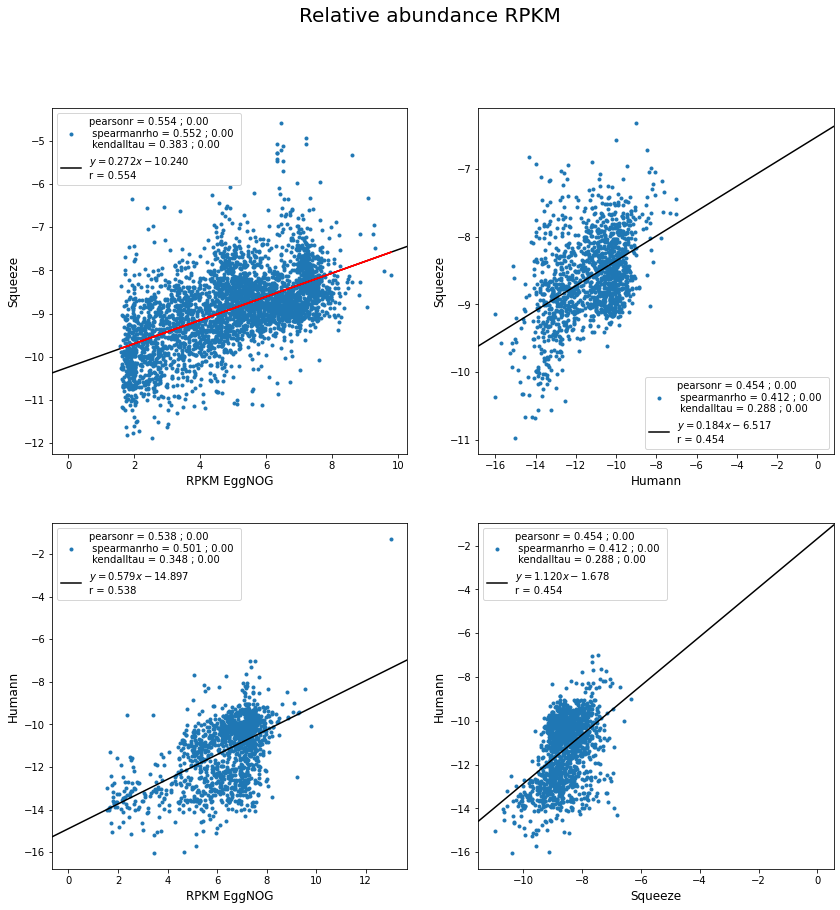

In [13]:
from scipy import stats
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(2, 2, figsize = (14,14))
fig.suptitle('Relative abundance RPKM', fontsize=20)


# reg = LinearRegression().fit(np.array(np.log(x_eggsq)), np.array(np.log(y_eggsq)), sample_weight=None)
# b = reg.intercept_
# m = reg.coef_[0]
# r = 0.5

model = LinearRegression()
x = np.array(np.log(x_eggsq))
y = np.array(np.log(y_eggsq))
model.fit(x.reshape(-1, 1), y)

r, p = stats.pearsonr(np.log(x_eggsq), np.log(y_eggsq))
rho, p2 = stats.spearmanr(np.log(x_eggsq), np.log(y_eggsq))
tau, p3 = stats.kendalltau(np.log(x_eggsq), np.log(y_eggsq))
axs[0,0].plot(np.log(x_eggsq), np.log(y_eggsq), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')
# fig.set_label(f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(x_eggsq), np.log(y_eggsq))
axs[0,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')

axs[0,0].plot(x, model.predict(x.reshape(-1, 1)), color='red')
axs[0,0].legend()
# axs[0,0].set_yscale('log')
# axs[0,0].set_xscale('log')
# axs[0,0].set_xlim(0.0000001, 0.011)
# axs[0,0].set_ylim(0.0000001, 0.011)
axs[0,0].set_ylabel('Squeeze', fontsize = 12)
axs[0,0].set_xlabel('RPKM EggNOG', fontsize = 12)
   


#axs[0,1].plot(np.log(x_husq), np.log(y_husq), '.')

r, p = stats.pearsonr(np.log(x_husq), np.log(y_husq))
rho, p2 = stats.spearmanr(np.log(x_husq), np.log(y_husq))
tau, p3 = stats.kendalltau(np.log(x_husq), np.log(y_husq))
axs[0,1].plot(np.log(x_husq), np.log(y_husq), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(x_husq), np.log(y_husq))
axs[0,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[0,1].legend()
# axs[0,1].set_yscale('log')
# axs[0,1].set_xscale('log')
# axs[0,1].set_xlim(0.0000001, 0.011)
# axs[0,1].set_ylim(0.0000001, 0.011)
axs[0,1].set_ylabel('Squeeze', fontsize = 12)
axs[0,1].set_xlabel('Humann', fontsize = 12)


#axs[1,0].plot(x_egghu, y_egghu, '.')
# axs[1,0].plot(np.log(x_egghu), np.log(y_egghu), '.')

r, p = stats.pearsonr(np.log(x_egghu), np.log(y_egghu))
rho, p2 = stats.spearmanr(np.log(x_egghu), np.log(y_egghu))
tau, p3 = stats.kendalltau(np.log(x_egghu), np.log(y_egghu))
axs[1,0].plot(np.log(x_egghu), np.log(y_egghu), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(x_egghu), np.log(y_egghu))
axs[1,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,0].legend()
# # axs[1,0].set_yscale('log')
# # axs[1,0].set_xscale('log')
# # axs[1,0].set_xlim(0.0000001, 0.011)
# # axs[1,0].set_ylim(0.0000001, 0.011)
# axs[1,0].set_xlim(-16, -5)
# axs[1,0].set_ylim(-16, -5)
axs[1,0].set_xlabel('RPKM EggNOG', fontsize = 12)
axs[1,0].set_ylabel('Humann', fontsize = 12)

# axs[1,1].plot(np.log(y_husq), np.log(x_husq), '.')

r, p = stats.pearsonr(np.log(y_husq), np.log(x_husq))
rho, p2 = stats.spearmanr(np.log(y_husq), np.log(x_husq))
tau, p3 = stats.kendalltau(np.log(y_husq), np.log(x_husq))
axs[1,1].plot(np.log(y_husq), np.log(x_husq), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(y_husq), np.log(x_husq))
axs[1,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,1].legend()
# axs[1,1].set_yscale('log')
# axs[1,1].set_xscale('log')
# axs[1,1].set_xlim(0.0000001, 0.011)
# axs[1,1].set_ylim(0.0000001, 0.011)
axs[1,1].set_ylabel('Humann', fontsize = 12)
axs[1,1].set_xlabel('Squeeze', fontsize = 12)

Text(0.5, 0, 'Squeeze')

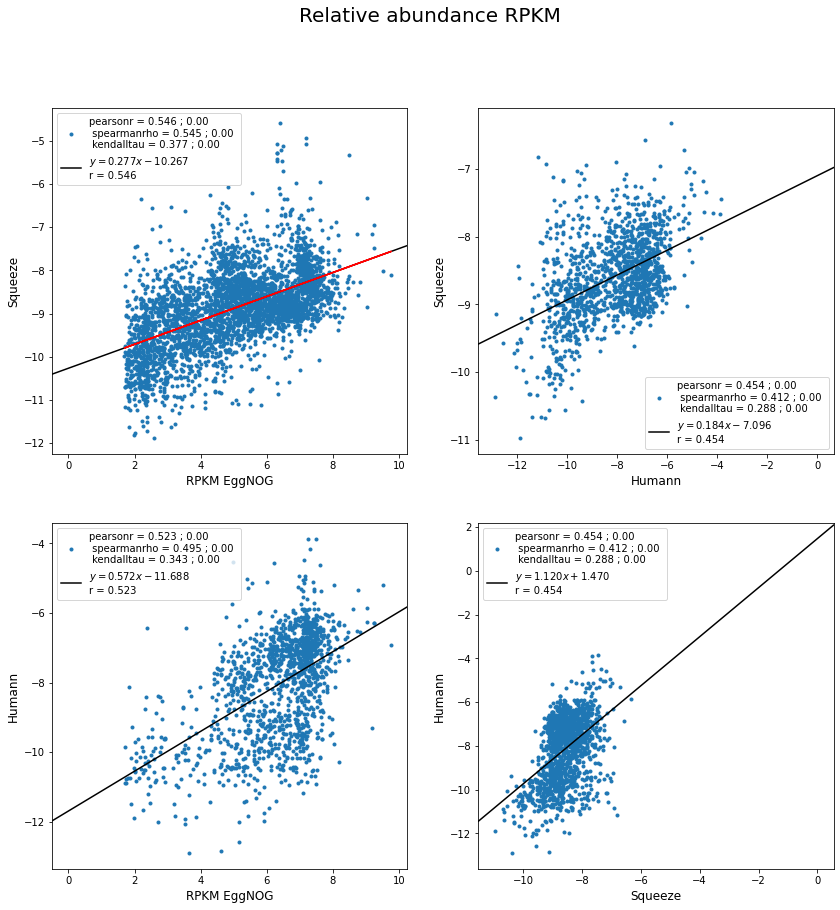

In [14]:
s0505_0101_eggnog_squeeze = merge_dicts(s0505_0101_noun_eggnog, s0505_0101_squeeze)
s0505_0101_eggnog_humann = merge_dicts(s0505_0101_noun_eggnog, s0505_0101_noun_humann)
s0505_0101_humann_squeeze = merge_dicts(s0505_0101_noun_humann, s0505_0101_squeeze)
s0505_0101_squeeze_humann = merge_dicts(s0505_0101_squeeze, s0505_0101_noun_humann)

x_eggsq,y_eggsq = get_xy(s0505_0101_eggnog_squeeze)
x_egghu, y_egghu = get_xy(s0505_0101_eggnog_humann) 
x_husq, y_husq = get_xy(s0505_0101_humann_squeeze)

from scipy import stats
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(2, 2, figsize = (14,14))
fig.suptitle('Relative abundance RPKM', fontsize=20)


# reg = LinearRegression().fit(np.array(np.log(x_eggsq)), np.array(np.log(y_eggsq)), sample_weight=None)
# b = reg.intercept_
# m = reg.coef_[0]
# r = 0.5

model = LinearRegression()
x = np.array(np.log(x_eggsq))
y = np.array(np.log(y_eggsq))
model.fit(x.reshape(-1, 1), y)

r, p = stats.pearsonr(np.log(x_eggsq), np.log(y_eggsq))
rho, p2 = stats.spearmanr(np.log(x_eggsq), np.log(y_eggsq))
tau, p3 = stats.kendalltau(np.log(x_eggsq), np.log(y_eggsq))
axs[0,0].plot(np.log(x_eggsq), np.log(y_eggsq), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')
# fig.set_label(f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(x_eggsq), np.log(y_eggsq))
axs[0,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')

axs[0,0].plot(x, model.predict(x.reshape(-1, 1)), color='red')
axs[0,0].legend()
# axs[0,0].set_yscale('log')
# axs[0,0].set_xscale('log')
# axs[0,0].set_xlim(0.0000001, 0.011)
# axs[0,0].set_ylim(0.0000001, 0.011)
axs[0,0].set_ylabel('Squeeze', fontsize = 12)
axs[0,0].set_xlabel('RPKM EggNOG', fontsize = 12)
   


#axs[0,1].plot(np.log(x_husq), np.log(y_husq), '.')

r, p = stats.pearsonr(np.log(x_husq), np.log(y_husq))
rho, p2 = stats.spearmanr(np.log(x_husq), np.log(y_husq))
tau, p3 = stats.kendalltau(np.log(x_husq), np.log(y_husq))
axs[0,1].plot(np.log(x_husq), np.log(y_husq), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(x_husq), np.log(y_husq))
axs[0,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[0,1].legend()
# axs[0,1].set_yscale('log')
# axs[0,1].set_xscale('log')
# axs[0,1].set_xlim(0.0000001, 0.011)
# axs[0,1].set_ylim(0.0000001, 0.011)
axs[0,1].set_ylabel('Squeeze', fontsize = 12)
axs[0,1].set_xlabel('Humann', fontsize = 12)


#axs[1,0].plot(x_egghu, y_egghu, '.')
# axs[1,0].plot(np.log(x_egghu), np.log(y_egghu), '.')

r, p = stats.pearsonr(np.log(x_egghu), np.log(y_egghu))
rho, p2 = stats.spearmanr(np.log(x_egghu), np.log(y_egghu))
tau, p3 = stats.kendalltau(np.log(x_egghu), np.log(y_egghu))
axs[1,0].plot(np.log(x_egghu), np.log(y_egghu), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(x_egghu), np.log(y_egghu))
axs[1,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,0].legend()
# # axs[1,0].set_yscale('log')
# # axs[1,0].set_xscale('log')
# # axs[1,0].set_xlim(0.0000001, 0.011)
# # axs[1,0].set_ylim(0.0000001, 0.011)
# axs[1,0].set_xlim(-16, -5)
# axs[1,0].set_ylim(-16, -5)
axs[1,0].set_xlabel('RPKM EggNOG', fontsize = 12)
axs[1,0].set_ylabel('Humann', fontsize = 12)

# axs[1,1].plot(np.log(y_husq), np.log(x_husq), '.')

r, p = stats.pearsonr(np.log(y_husq), np.log(x_husq))
rho, p2 = stats.spearmanr(np.log(y_husq), np.log(x_husq))
tau, p3 = stats.kendalltau(np.log(y_husq), np.log(x_husq))
axs[1,1].plot(np.log(y_husq), np.log(x_husq), '.', label=f'pearsonr = {r:.3f} ; {p:.2f} \n spearmanrho = {rho:.3f} ; {p2:.2f} \n kendalltau = {tau:.3f} ; {p3:.2f}')

m, b, r, *_ = stats.linregress(np.log(y_husq), np.log(x_husq))
axs[1,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,1].legend()
# axs[1,1].set_yscale('log')
# axs[1,1].set_xscale('log')
# axs[1,1].set_xlim(0.0000001, 0.011)
# axs[1,1].set_ylim(0.0000001, 0.011)
axs[1,1].set_ylabel('Humann', fontsize = 12)
axs[1,1].set_xlabel('Squeeze', fontsize = 12)

In [15]:
s0505_0101_eggnog_squeeze = merge_dicts(s0505_0101_rpkm_eggnog, s0505_0101_squeeze)
s0505_0101_eggnog_humann = merge_dicts(s0505_0101_rpkm_eggnog, s0505_0101_my_humann)
s0505_0101_humann_squeeze = merge_dicts(s0505_0101_my_humann, s0505_0101_squeeze)
s0505_0101_squeeze_humann = merge_dicts(s0505_0101_squeeze, s0505_0101_my_humann)

x_eggsq,y_eggsq = get_xy(s0505_0101_eggnog_squeeze)
x_egghu, y_egghu = get_xy(s0505_0101_eggnog_humann) 
x_husq, y_husq = get_xy(s0505_0101_humann_squeeze)

Text(0.5, 0, 'Squeeze')

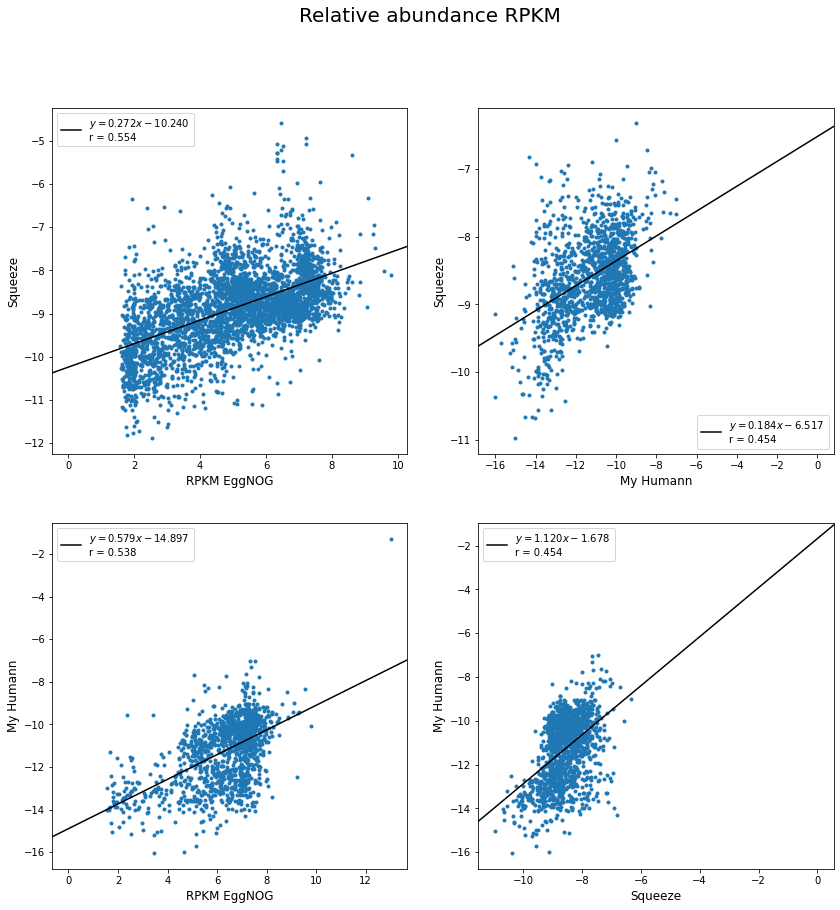

In [16]:

from scipy import stats

fig, axs = plt.subplots(2, 2, figsize = (14,14))
fig.suptitle('Relative abundance RPKM', fontsize=20)

axs[0,0].plot(np.log(x_eggsq), np.log(y_eggsq), '.')
m, b, r, *_ = stats.linregress(np.log(x_eggsq), np.log(y_eggsq))
axs[0,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[0,0].legend()
# axs[0,0].set_yscale('log')
# axs[0,0].set_xscale('log')
# axs[0,0].set_xlim(0.0000001, 0.011)
# axs[0,0].set_ylim(0.0000001, 0.011)
axs[0,0].set_ylabel('Squeeze', fontsize = 12)
axs[0,0].set_xlabel('RPKM EggNOG', fontsize = 12)
   
axs[0,1].plot(np.log(x_husq), np.log(y_husq), '.')
m, b, r, *_ = stats.linregress(np.log(x_husq), np.log(y_husq))
axs[0,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[0,1].legend()
# axs[0,1].set_yscale('log')
# axs[0,1].set_xscale('log')
# axs[0,1].set_xlim(0.0000001, 0.011)
# axs[0,1].set_ylim(0.0000001, 0.011)
axs[0,1].set_ylabel('Squeeze', fontsize = 12)
axs[0,1].set_xlabel('My Humann', fontsize = 12)


#axs[1,0].plot(x_egghu, y_egghu, '.')
axs[1,0].plot(np.log(x_egghu), np.log(y_egghu), '.')
m, b, r, *_ = stats.linregress(np.log(x_egghu), np.log(y_egghu))
axs[1,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,0].legend()
# # axs[1,0].set_yscale('log')
# # axs[1,0].set_xscale('log')
# # axs[1,0].set_xlim(0.0000001, 0.011)
# # axs[1,0].set_ylim(0.0000001, 0.011)
# axs[1,0].set_xlim(-16, -5)
# axs[1,0].set_ylim(-16, -5)
axs[1,0].set_xlabel('RPKM EggNOG', fontsize = 12)
axs[1,0].set_ylabel('My Humann', fontsize = 12)

axs[1,1].plot(np.log(y_husq), np.log(x_husq), '.')
m, b, r, *_ = stats.linregress(np.log(y_husq), np.log(x_husq))
axs[1,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,1].legend()
# axs[1,1].set_yscale('log')
# axs[1,1].set_xscale('log')
# axs[1,1].set_xlim(0.0000001, 0.011)
# axs[1,1].set_ylim(0.0000001, 0.011)
axs[1,1].set_ylabel('My Humann', fontsize = 12)
axs[1,1].set_xlabel('Squeeze', fontsize = 12)


In [17]:
s0505_0101_eggnog_squeeze = merge_dicts(s0505_0101_tm_eggnog, s0505_0101_squeeze)
s0505_0101_eggnog_humann = merge_dicts(s0505_0101_tm_eggnog, s0505_0101_my_humann)
s0505_0101_humann_squeeze = merge_dicts(s0505_0101_my_humann, s0505_0101_squeeze)
s0505_0101_squeeze_humann = merge_dicts(s0505_0101_squeeze, s0505_0101_my_humann)

x_eggsq,y_eggsq = get_xy(s0505_0101_eggnog_squeeze)
x_egghu, y_egghu = get_xy(s0505_0101_eggnog_humann) 
x_husq, y_husq = get_xy(s0505_0101_humann_squeeze)

Text(0.5, 0, 'Squeeze')

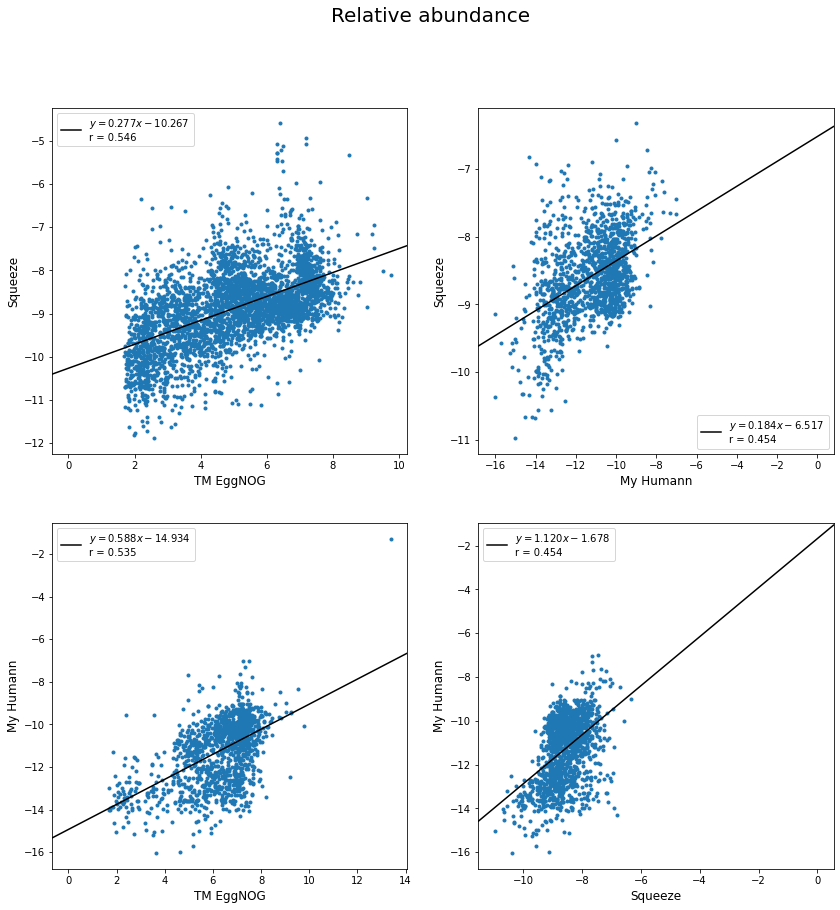

In [18]:
from scipy import stats

fig, axs = plt.subplots(2, 2, figsize = (14,14))
fig.suptitle('Relative abundance', fontsize=20)

axs[0,0].plot(np.log(x_eggsq), np.log(y_eggsq), '.')
m, b, r, *_ = stats.linregress(np.log(x_eggsq), np.log(y_eggsq))
axs[0,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[0,0].legend()
# axs[0,0].set_yscale('log')
# axs[0,0].set_xscale('log')
# axs[0,0].set_xlim(0.0000001, 0.011)
# axs[0,0].set_ylim(0.0000001, 0.011)
axs[0,0].set_ylabel('Squeeze', fontsize = 12)
axs[0,0].set_xlabel('TM EggNOG', fontsize = 12)
   
axs[0,1].plot(np.log(x_husq), np.log(y_husq), '.')
m, b, r, *_ = stats.linregress(np.log(x_husq), np.log(y_husq))
axs[0,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[0,1].legend()
# axs[0,1].set_yscale('log')
# axs[0,1].set_xscale('log')
# axs[0,1].set_xlim(0.0000001, 0.011)
# axs[0,1].set_ylim(0.0000001, 0.011)
axs[0,1].set_ylabel('Squeeze', fontsize = 12)
axs[0,1].set_xlabel('My Humann', fontsize = 12)


#axs[1,0].plot(x_egghu, y_egghu, '.')
axs[1,0].plot(np.log(x_egghu), np.log(y_egghu), '.')
m, b, r, *_ = stats.linregress(np.log(x_egghu), np.log(y_egghu))
axs[1,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,0].legend()
# # axs[1,0].set_yscale('log')
# # axs[1,0].set_xscale('log')
# # axs[1,0].set_xlim(0.0000001, 0.011)
# # axs[1,0].set_ylim(0.0000001, 0.011)
# axs[1,0].set_xlim(-16, -5)
# axs[1,0].set_ylim(-16, -5)
axs[1,0].set_xlabel('TM EggNOG', fontsize = 12)
axs[1,0].set_ylabel('My Humann', fontsize = 12)

axs[1,1].plot(np.log(y_husq), np.log(x_husq), '.')
m, b, r, *_ = stats.linregress(np.log(y_husq), np.log(x_husq))
axs[1,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,1].legend()
# axs[1,1].set_yscale('log')
# axs[1,1].set_xscale('log')
# axs[1,1].set_xlim(0.0000001, 0.011)
# axs[1,1].set_ylim(0.0000001, 0.011)
axs[1,1].set_ylabel('My Humann', fontsize = 12)
axs[1,1].set_xlabel('Squeeze', fontsize = 12)


In [19]:
s0505_0101_eggnog_squeeze = merge_dicts(s0505_0101_narrowest_eggnog, s0505_0101_squeeze)
s0505_0101_eggnog_humann = merge_dicts(s0505_0101_narrowest_eggnog, s0505_0101_my_humann)
s0505_0101_humann_squeeze = merge_dicts(s0505_0101_my_humann, s0505_0101_squeeze)
s0505_0101_squeeze_humann = merge_dicts(s0505_0101_squeeze, s0505_0101_my_humann)

x_eggsq,y_eggsq = get_xy(s0505_0101_eggnog_squeeze)
x_egghu, y_egghu = get_xy(s0505_0101_eggnog_humann) 
x_husq, y_husq = get_xy(s0505_0101_humann_squeeze)

Text(0.5, 0, 'Squeeze')

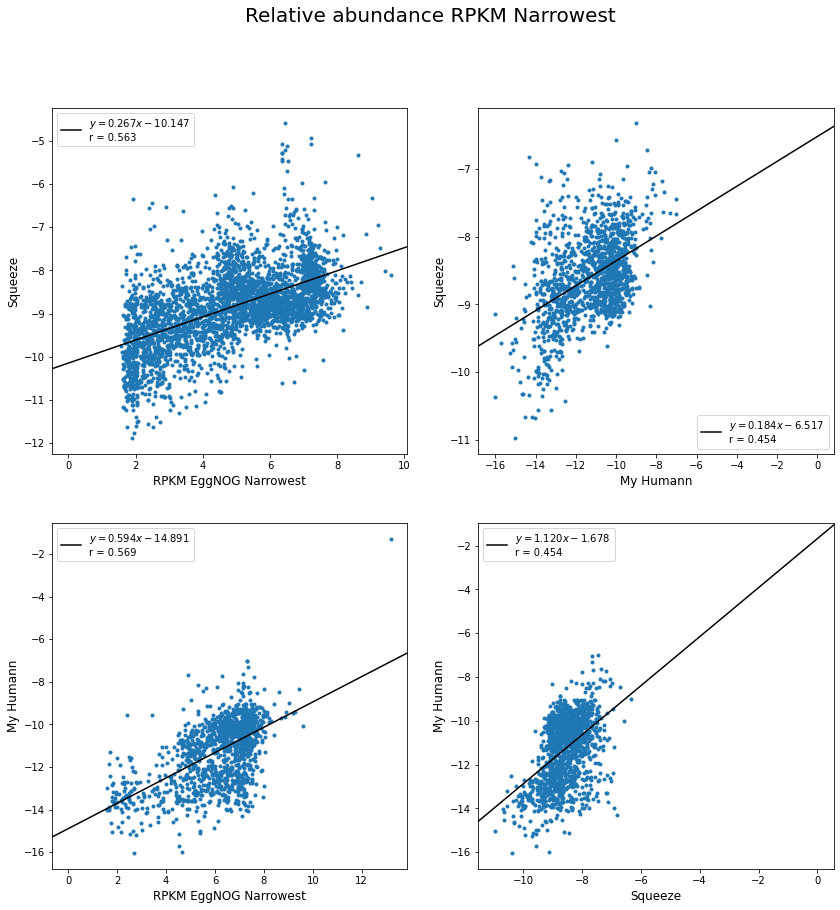

In [20]:
from scipy import stats

fig, axs = plt.subplots(2, 2, figsize = (14,14))
fig.suptitle('Relative abundance RPKM Narrowest', fontsize=20)

axs[0,0].plot(np.log(x_eggsq), np.log(y_eggsq), '.')
m, b, r, *_ = stats.linregress(np.log(x_eggsq), np.log(y_eggsq))
axs[0,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[0,0].legend()
# axs[0,0].set_yscale('log')
# axs[0,0].set_xscale('log')
# axs[0,0].set_xlim(0.0000001, 0.011)
# axs[0,0].set_ylim(0.0000001, 0.011)
axs[0,0].set_ylabel('Squeeze', fontsize = 12)
axs[0,0].set_xlabel('RPKM EggNOG Narrowest', fontsize = 12)
   
axs[0,1].plot(np.log(x_husq), np.log(y_husq), '.')
m, b, r, *_ = stats.linregress(np.log(x_husq), np.log(y_husq))
axs[0,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[0,1].legend()
# axs[0,1].set_yscale('log')
# axs[0,1].set_xscale('log')
# axs[0,1].set_xlim(0.0000001, 0.011)
# axs[0,1].set_ylim(0.0000001, 0.011)
axs[0,1].set_ylabel('Squeeze', fontsize = 12)
axs[0,1].set_xlabel('My Humann', fontsize = 12)


#axs[1,0].plot(x_egghu, y_egghu, '.')
axs[1,0].plot(np.log(x_egghu), np.log(y_egghu), '.')
m, b, r, *_ = stats.linregress(np.log(x_egghu), np.log(y_egghu))
axs[1,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,0].legend()
# # axs[1,0].set_yscale('log')
# # axs[1,0].set_xscale('log')
# # axs[1,0].set_xlim(0.0000001, 0.011)
# # axs[1,0].set_ylim(0.0000001, 0.011)
# axs[1,0].set_xlim(-16, -5)
# axs[1,0].set_ylim(-16, -5)
axs[1,0].set_xlabel('RPKM EggNOG Narrowest', fontsize = 12)
axs[1,0].set_ylabel('My Humann', fontsize = 12)

axs[1,1].plot(np.log(y_husq), np.log(x_husq), '.')
m, b, r, *_ = stats.linregress(np.log(y_husq), np.log(x_husq))
axs[1,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,1].legend()
# axs[1,1].set_yscale('log')
# axs[1,1].set_xscale('log')
# axs[1,1].set_xlim(0.0000001, 0.011)
# axs[1,1].set_ylim(0.0000001, 0.011)
axs[1,1].set_ylabel('My Humann', fontsize = 12)
axs[1,1].set_xlabel('Squeeze', fontsize = 12)

In [21]:
s0505_0101_eggnog_squeeze = merge_dicts(s0505_0101_tm_narrowest_eggnog, s0505_0101_squeeze)
s0505_0101_eggnog_humann = merge_dicts(s0505_0101_tm_narrowest_eggnog, s0505_0101_my_humann)
s0505_0101_humann_squeeze = merge_dicts(s0505_0101_my_humann, s0505_0101_squeeze)
s0505_0101_squeeze_humann = merge_dicts(s0505_0101_squeeze, s0505_0101_my_humann)

x_eggsq,y_eggsq = get_xy(s0505_0101_eggnog_squeeze)
x_egghu, y_egghu = get_xy(s0505_0101_eggnog_humann) 
x_husq, y_husq = get_xy(s0505_0101_humann_squeeze)

Text(0.5, 0, 'Squeeze')

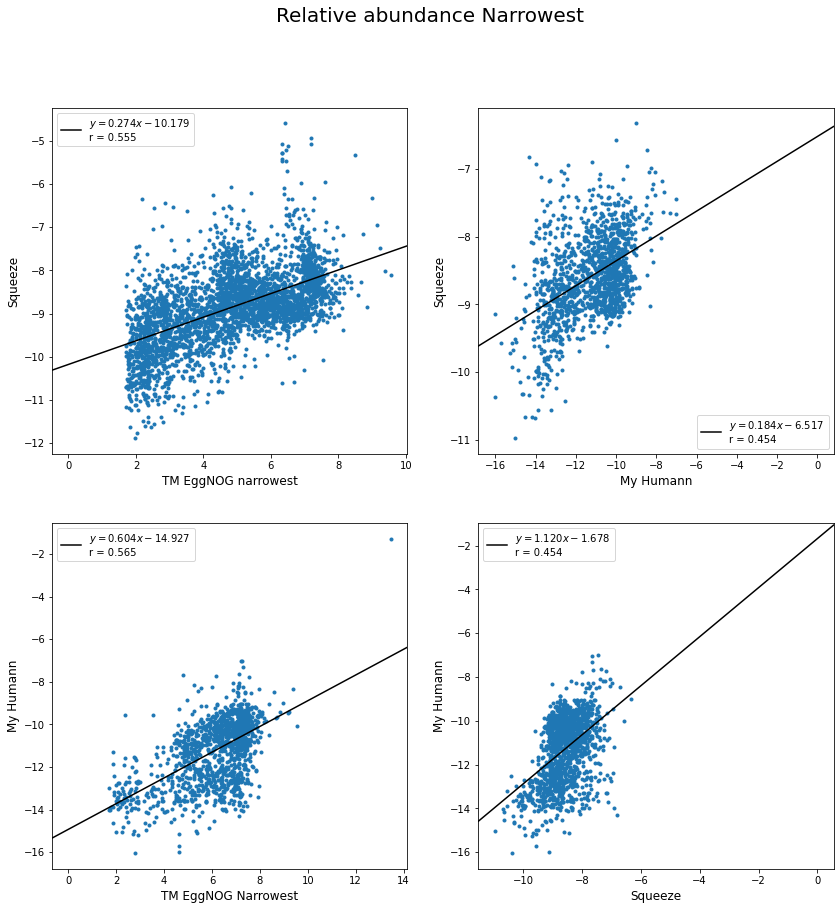

In [22]:
from scipy import stats

fig, axs = plt.subplots(2, 2, figsize = (14,14))
fig.suptitle('Relative abundance Narrowest', fontsize=20)

axs[0,0].plot(np.log(x_eggsq), np.log(y_eggsq), '.')
m, b, r, *_ = stats.linregress(np.log(x_eggsq), np.log(y_eggsq))
axs[0,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[0,0].legend()
# axs[0,0].set_yscale('log')
# axs[0,0].set_xscale('log')
# axs[0,0].set_xlim(0.0000001, 0.011)
# axs[0,0].set_ylim(0.0000001, 0.011)
axs[0,0].set_ylabel('Squeeze', fontsize = 12)
axs[0,0].set_xlabel('TM EggNOG narrowest', fontsize = 12)
   
axs[0,1].plot(np.log(x_husq), np.log(y_husq), '.')
m, b, r, *_ = stats.linregress(np.log(x_husq), np.log(y_husq))
axs[0,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[0,1].legend()
# axs[0,1].set_yscale('log')
# axs[0,1].set_xscale('log')
# axs[0,1].set_xlim(0.0000001, 0.011)
# axs[0,1].set_ylim(0.0000001, 0.011)
axs[0,1].set_ylabel('Squeeze', fontsize = 12)
axs[0,1].set_xlabel('My Humann', fontsize = 12)


#axs[1,0].plot(x_egghu, y_egghu, '.')
axs[1,0].plot(np.log(x_egghu), np.log(y_egghu), '.')
m, b, r, *_ = stats.linregress(np.log(x_egghu), np.log(y_egghu))
axs[1,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,0].legend()
# # axs[1,0].set_yscale('log')
# # axs[1,0].set_xscale('log')
# # axs[1,0].set_xlim(0.0000001, 0.011)
# # axs[1,0].set_ylim(0.0000001, 0.011)
# axs[1,0].set_xlim(-16, -5)
# axs[1,0].set_ylim(-16, -5)
axs[1,0].set_xlabel('TM EggNOG Narrowest', fontsize = 12)
axs[1,0].set_ylabel('My Humann', fontsize = 12)

axs[1,1].plot(np.log(y_husq), np.log(x_husq), '.')
m, b, r, *_ = stats.linregress(np.log(y_husq), np.log(x_husq))
axs[1,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,1].legend()
# axs[1,1].set_yscale('log')
# axs[1,1].set_xscale('log')
# axs[1,1].set_xlim(0.0000001, 0.011)
# axs[1,1].set_ylim(0.0000001, 0.011)
axs[1,1].set_ylabel('My Humann', fontsize = 12)
axs[1,1].set_xlabel('Squeeze', fontsize = 12)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Squeeze')

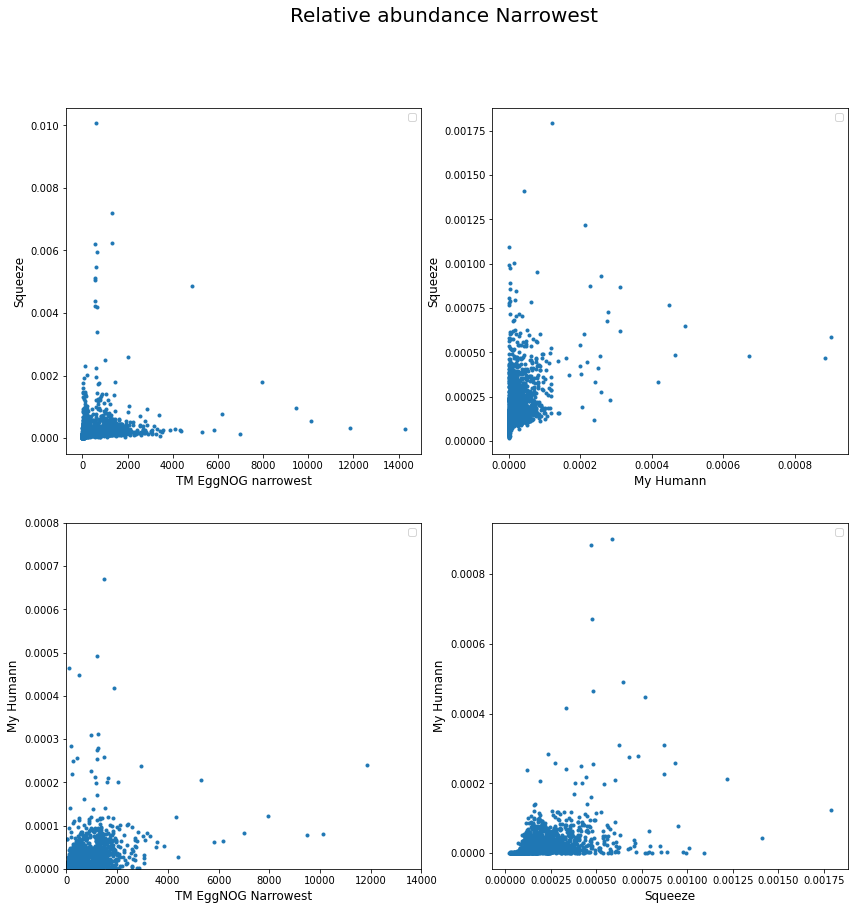

In [23]:
from scipy import stats

fig, axs = plt.subplots(2, 2, figsize = (14,14))
fig.suptitle('Relative abundance Narrowest', fontsize=20)

axs[0,0].plot(x_eggsq, y_eggsq, '.')
# m, b, r, *_ = stats.linregress(np.log(x_eggsq), np.log(y_eggsq))
# axs[0,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[0,0].legend()
# axs[0,0].set_yscale('log')
# axs[0,0].set_xscale('log')
# axs[0,0].set_xlim(0.0000001, 0.011)
# axs[0,0].set_ylim(0.0000001, 0.011)
axs[0,0].set_ylabel('Squeeze', fontsize = 12)
axs[0,0].set_xlabel('TM EggNOG narrowest', fontsize = 12)
   
axs[0,1].plot(x_husq, y_husq, '.')
# m, b, r, *_ = stats.linregress(np.log(x_husq), np.log(y_husq))
# axs[0,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[0,1].legend()
# axs[0,1].set_yscale('log')
# axs[0,1].set_xscale('log')
# axs[0,1].set_xlim(0.0000001, 0.011)
# axs[0,1].set_ylim(0.0000001, 0.011)
axs[0,1].set_ylabel('Squeeze', fontsize = 12)
axs[0,1].set_xlabel('My Humann', fontsize = 12)


#axs[1,0].plot(x_egghu, y_egghu, '.')
axs[1,0].plot(x_egghu, y_egghu, '.')
# m, b, r, *_ = stats.linregress(np.log(x_egghu), np.log(y_egghu))
# axs[1,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,0].legend()
# # axs[1,0].set_yscale('log')
# # axs[1,0].set_xscale('log')
# # axs[1,0].set_xlim(0.0000001, 0.011)
# # axs[1,0].set_ylim(0.0000001, 0.011)
axs[1,0].set_xlim(0, 14000)
axs[1,0].set_ylim(0, 0.0008)
axs[1,0].set_xlabel('TM EggNOG Narrowest', fontsize = 12)
axs[1,0].set_ylabel('My Humann', fontsize = 12)

axs[1,1].plot(y_husq, x_husq, '.')
# m, b, r, *_ = stats.linregress(np.log(y_husq), np.log(x_husq))
# axs[1,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,1].legend()
# axs[1,1].set_yscale('log')
# axs[1,1].set_xscale('log')
# axs[1,1].set_xlim(0.0000001, 0.011)
# axs[1,1].set_ylim(0.0000001, 0.011)
axs[1,1].set_ylabel('My Humann', fontsize = 12)
axs[1,1].set_xlabel('Squeeze', fontsize = 12)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Squeeze')

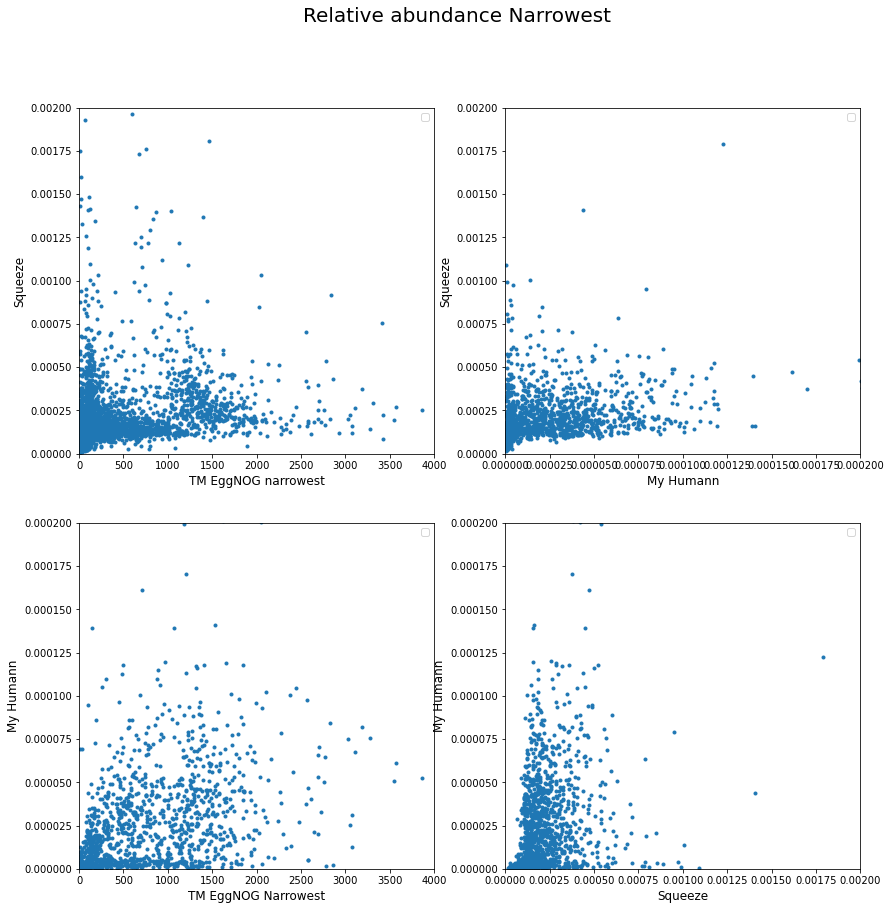

In [24]:
from scipy import stats

fig, axs = plt.subplots(2, 2, figsize = (14,14))
fig.suptitle('Relative abundance Narrowest', fontsize=20)

axs[0,0].plot(x_eggsq, y_eggsq, '.')
# m, b, r, *_ = stats.linregress(np.log(x_eggsq), np.log(y_eggsq))
# axs[0,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[0,0].legend()
# axs[0,0].set_yscale('log')
# axs[0,0].set_xscale('log')
axs[0,0].set_xlim(0, 4000)
axs[0,0].set_ylim(0, 0.002)
axs[0,0].set_ylabel('Squeeze', fontsize = 12)
axs[0,0].set_xlabel('TM EggNOG narrowest', fontsize = 12)
   
axs[0,1].plot(x_husq, y_husq, '.')
# m, b, r, *_ = stats.linregress(np.log(x_husq), np.log(y_husq))
# axs[0,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[0,1].legend()
# axs[0,1].set_yscale('log')
# axs[0,1].set_xscale('log')
axs[0,1].set_xlim(0, 0.0002)
axs[0,1].set_ylim(0, 0.002)
axs[0,1].set_ylabel('Squeeze', fontsize = 12)
axs[0,1].set_xlabel('My Humann', fontsize = 12)


#axs[1,0].plot(x_egghu, y_egghu, '.')
axs[1,0].plot(x_egghu, y_egghu, '.')
# m, b, r, *_ = stats.linregress(np.log(x_egghu), np.log(y_egghu))
# axs[1,0].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,0].legend()
# # axs[1,0].set_yscale('log')
# # axs[1,0].set_xscale('log')
# # axs[1,0].set_xlim(0.0000001, 0.011)
# # axs[1,0].set_ylim(0.0000001, 0.011)
axs[1,0].set_xlim(0, 4000)
axs[1,0].set_ylim(0, 0.0002)
axs[1,0].set_xlabel('TM EggNOG Narrowest', fontsize = 12)
axs[1,0].set_ylabel('My Humann', fontsize = 12)

axs[1,1].plot(y_husq, x_husq, '.')
# m, b, r, *_ = stats.linregress(np.log(y_husq), np.log(x_husq))
# axs[1,1].axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}x {b:+.3f}$\nr = {r:.3f}', color='black')
axs[1,1].legend()
# axs[1,1].set_yscale('log')
# axs[1,1].set_xscale('log')
axs[1,1].set_ylim(0, 0.0002)
axs[1,1].set_xlim(0, 0.002)
axs[1,1].set_ylabel('My Humann', fontsize = 12)
axs[1,1].set_xlabel('Squeeze', fontsize = 12)